<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/WEEK%209/Regression_Model_SVM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

In [22]:
# Load dataset
# Pastikan file creditdataset.csv berada dalam direktori yang sama
# atau gunakan path lengkap ke file jika berada di lokasi berbeda.
data = pd.read_csv('/content/drive/MyDrive/Dataset ML/CreditDataset.csv')

# Menampilkan informasi umum tentang dataset
print("Informasi dataset:")
print(data.info())
print("\nStatistik deskriptif:\n", data.describe())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.


Metrik evaluasi:
Mean Squared Error (MSE): 6374634.712715206
Mean Absolute Error (MAE): 1631.5638349689707
R^2 Score: -0.04777064224402294
ROC-AUC tidak relevan untuk kasus ini atau error: multi_class must be in ('ovo', 'ovr')
Precision-Recall Curve tidak relevan untuk kasus ini atau error: multiclass format is not supported


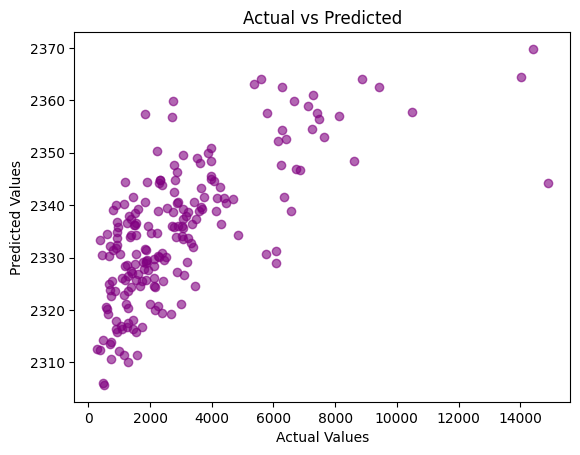

In [23]:
# Pisahkan fitur (X) dan target (y)
# Ganti 'target_column' dengan nama kolom target pada dataset
X = data.drop('x5', axis=1)
y = data['x5']

# Identifikasi kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Transformasi data: OneHotEncoding untuk fitur kategorikal dan StandardScaler untuk numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Splitting dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan preprocessing pada data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Membuat model SVM Regression dengan kernel RBF
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Melatih model
svr_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMetrik evaluasi:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Perhitungan ROC-AUC hanya relevan jika target biner, ubah kode ini jika sesuai dengan klasifikasi
try:
    auc_score = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()
except Exception as e:
    print("ROC-AUC tidak relevan untuk kasus ini atau error:", e)

# Precision-Recall Curve jika dibutuhkan
try:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall Curve
    plt.figure()
    plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()
except Exception as e:
    print("Precision-Recall Curve tidak relevan untuk kasus ini atau error:", e)

# Plot perbandingan hasil prediksi dan nilai aktual
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()